In [144]:
from pandas import read_csv
from matplotlib import pyplot

stops = read_csv('https://static.data.gov.hk/td/pt-headway-tc/stops.txt')
routes = read_csv('https://static.data.gov.hk/td/pt-headway-tc/routes.txt')
trips = read_csv('https://static.data.gov.hk/td/pt-headway-tc/trips.txt')
stop_times = read_csv('https://static.data.gov.hk/td/pt-headway-tc/stop_times.txt')

In [145]:
# your code to add route 5005 here


display(routes[routes.route_short_name=='5005'])

,route_id,agency_id,route_short_name,route_long_name,route_type,route_url



258D (10) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=258D&lang=zh-hk
https://google.com/maps/dir/22.32889%09114.21163/22.33533%09114.20759/22.33928%09114.20226/22.34153%09114.19553/22.34156%09114.19134/22.34233%09114.18851/22.34257%09114.17289/22.34159%09114.16675/22.35753%09114.01969/22.35845%09114.01883/22.39365%09113.96753

259D (10) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=259D&lang=zh-hk
https://google.com/maps/dir/22.32889%09114.21163/22.33533%09114.20759/22.33928%09114.20226/22.34153%09114.19553/22.34156%09114.19134/22.34233%09114.18851/22.34257%09114.17289/22.34159%09114.16675/22.35753%09114.01969/22.35845%09114.01883/22.38172%09113.97039

62X (8) https://search.kmb.hk/KMBWebSite/?action=routesearch&route=62X&lang=zh-hk
https://google.com/maps/dir/22.32889%09114.21163/22.33533%09114.20759/22.33928%09114.20226/22.34153%09114.19553/22.34156%09114.19134/22.34233%09114.18851/22.34257%09114.17289/22.34159%09114.16675/22.38396%09113.97264

259D (10)

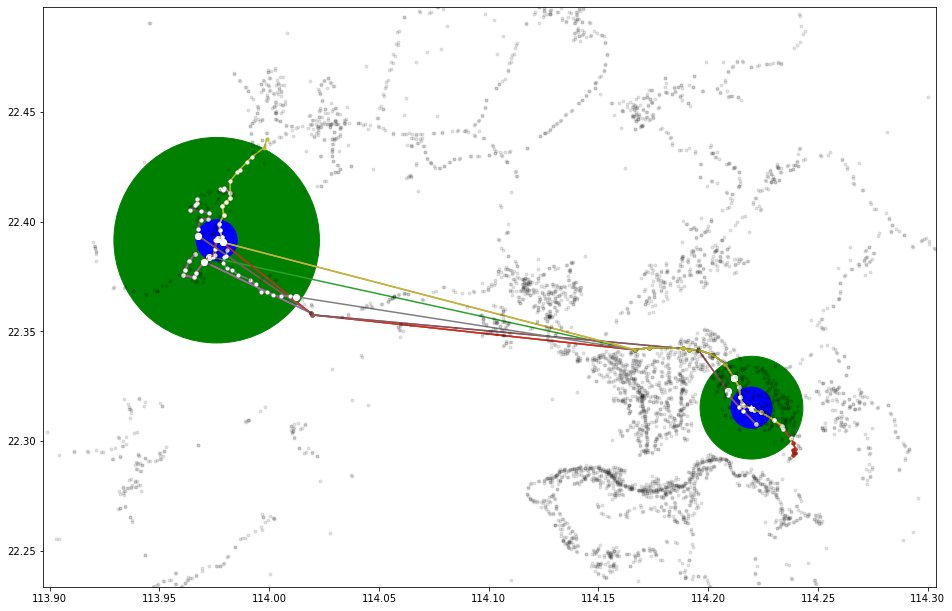

In [147]:
# delete original comments and add your comments

pyplot.figure(figsize=(16,16*4/6))#,dpi=200)
pyplot.axis('equal')
# pyplot.plot(stops.stop_lon,stops.stop_lat,'.k')

on = 2.5 / 106.8
off = 5 / 106.8
O = [(_[1],_[0]) for _ in [(22.31525,114.21969)]][0] # 22.31530475399208, 114.21957392390405
D = [(_[1],_[0]) for _ in [(22.39156,113.97605)]][0] # 22.39156547620579, 113.97605453160803
# stop = stops.stop_id.isin([8219])
# stop = stops.stop_name.str.contains('觀塘（雅麗道）總站')
# stop = stops.location_type==0 # all
stop   = (((stops.stop_lon-O[0])**2+(stops.stop_lat-O[1])**2)**0.5 < on)
select = stop_times.stop_id.isin(stops.stop_id[stop])
Select = stop_times.trip_id[select].isin(stop_times.trip_id[stop_times.stop_id.isin(stops.stop_id[
         ((stops.stop_lon-D[0])**2+(stops.stop_lat-D[1])**2)**0.5 < off])])

# route = routes.route_id.isin([1035,1409])
# route = routes.agency_id.isin(['KMB'])
# route = routes.route_short_name.isin('13M 95M'.split())
# route = routes.route_long_name.str.contains('雅麗道')
# route = routes.route_type==3 # 0: TRAM, 3: KMB..., 4: FERRY, 7: PTRAM
# select = stop_times.trip_id.str[0:4].astype(int).isin(routes.route_id[route])#; stop = slice(0)

route_id = [] # route = {} ; route[trip_id[0:4]] = trip_id
# for trip_id in stop_times.trip_id[select]:# & (stop_times.trip_id.str[5].astype(int).isin([1,2]))]:
for trip_id in stop_times.trip_id[select][Select].unique():
# %time stop_times.trip_id[select & stop_times.trip_id.isin(stop_times.trip_id[select2])]
    if trip_id[0:6] not in route_id:
        route_id += [trip_id[0:6]]
        trip = stop_times[stop_times.trip_id == trip_id][['stop_id','stop_sequence']].merge(stops)
        d = ((trip.stop_lon-D[0])**2+(trip.stop_lat-D[1])**2)**0.5 < off
        o = ((trip.stop_lon-O[0])**2+(trip.stop_lat-O[1])**2)**0.5 < on
        dmin = min(d[d].index)
        omax = max(o[o].index)
#         if max(d) & max(o):
        if (max(d[d].index)>=omax):# & (dmin-omax<=5):
            pyplot.plot(trip.stop_lon,trip.stop_lat,'.-')
            pyplot.plot(trip.stop_lon[o|d],trip.stop_lat[o|d],'w.',trip.stop_lon[[omax,dmin]],trip.stop_lat[[omax,dmin]],'wo')
            print(f'\n{routes.route_short_name[routes.route_id == int(trip_id[0:4])].values[0]} ({dmin-omax if max(d) else ""})',
                  routes.route_url[routes.route_id == int(trip_id[0:4])].values[0])
#             display(trip[o|d].iloc[:,:-3],trip_id)
            print('https://google.com/maps/dir/'+'/'.join(round(trip.stop_lat[omax:dmin+1],8).astype(str)+'%09'+round(trip.stop_lon[omax:dmin+1],9).astype(str)))
#             print('\nhttps://google.com/maps/dir/'+'/'.join(round(trip.stop_lat[o|d],8).astype(str)+'%09'+round(trip.stop_lon[o|d],9).astype(str)))
#         print(end='.')
# print('\n',routes.route_short_name[routes.route_id.isin([_[0:4] for _ in route_id])].values)

stop = stops.stop_id.isin(stop_times.stop_id[stop_times.trip_id.str[0:6].isin(route_id)])
xlim = pyplot.gca().get_xlim()
pyplot.autoscale(False)
pyplot.plot(stops.stop_lon[-stop],stops.stop_lat[-stop],'.k',alpha=.1)
pyplot.gcf().gca().add_artist(pyplot.Circle(O,on,color='g'))
pyplot.gcf().gca().add_artist(pyplot.Circle(D,off,color='g'))
# pyplot.gcf().gca().add_artist(pyplot.Circle(((O[0]+D[0])/2,(O[1]+D[1])/2),5/106.8,color='g',fill=0))
pyplot.gcf().gca().add_artist(pyplot.Circle(O,1/106.8,color='b'))
pyplot.gcf().gca().add_artist(pyplot.Circle(D,1/106.8,color='b'))
pyplot.plot(O[0],O[1],'w*',D[0],D[1],'w*');
pyplot.xlim(xlim[0]-0.05,xlim[1]+0.05);
# pyplot.show()
# display(stops[stop])